# One-layer Neural Network

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## function for variables

In [2]:
def init_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.01))

In [3]:
?truncated_normal

Object `truncated_normal` not found.


## function for model construction

In [4]:
def model(X, w_h, w_h2, w_o):
    h = tf.nn.relu(tf.matmul(X, w_h))
    h2 = tf.nn.relu(tf.matmul(h, w_h2))
    return tf.matmul(h2, w_o)

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
X_trn, Y_trn, X_test, Y_test = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## make placeholder for inputs and labels

In [6]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.int32, [None])

## weight variable 와 Model 만들기
### 첫번째 hidden layer은 input을 784 / 2 = 392 차원으로 보낸다.
### 두번째 hidden layer은 392차원을 다시 392차원으로 보낸다.
### output layer에서는 이를 label의 차원인 10차원으로 보낸다.

In [7]:
hidden_dim = 392
w_h = init_weights([784, hidden_dim])
w_h2 = init_weights([hidden_dim, hidden_dim])
w_o = init_weights([hidden_dim, 10])
py_x = model(X, w_h, w_h2, w_o)

## loss function

In [8]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(py_x, Y))

## Training operator
#### tf.train.AdagradOptimizer

In [9]:
train_op = tf.train.AdagradOptimizer(learning_rate=0.05).minimize(loss)

## Accuracy 계산
### tensorflow를 통해서 accuracy를 계산

In [10]:
correct = tf.nn.in_top_k(py_x, Y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

## Session initialize 및 training

In [11]:
trn_loss_list = list()
test_loss_list = list()
test_accuracy_list = list()
batch_size = 128
with tf.Session() as sess:    
    tf.initialize_all_variables().run()
    
    for i in range(100):
        trn_loss = 0
        for start, end in zip(range(0, len(X_trn), batch_size), range(batch_size, len(X_trn)+1, batch_size)):
            tmp_loss, _ = sess.run([loss, train_op], feed_dict={X: X_trn[start:end], Y: Y_trn[start:end]})
            trn_loss += tmp_loss
        trn_loss_list.append(trn_loss / 100)
        test_loss, test_acc = sess.run([loss, accuracy], feed_dict={X: X_test, Y: Y_test})
        test_loss_list.append(test_loss)
        test_accuracy_list.append(test_acc)
        print("epoch: {} test accuracy {:0.4f}".format(i, test_acc))

epoch: 0 test accuracy 0.8779
epoch: 1 test accuracy 0.9196
epoch: 2 test accuracy 0.9463
epoch: 3 test accuracy 0.9595
epoch: 4 test accuracy 0.9671
epoch: 5 test accuracy 0.9716
epoch: 6 test accuracy 0.9737
epoch: 7 test accuracy 0.9750
epoch: 8 test accuracy 0.9751
epoch: 9 test accuracy 0.9751
epoch: 10 test accuracy 0.9765
epoch: 11 test accuracy 0.9778
epoch: 12 test accuracy 0.9778
epoch: 13 test accuracy 0.9779
epoch: 14 test accuracy 0.9780
epoch: 15 test accuracy 0.9785
epoch: 16 test accuracy 0.9785
epoch: 17 test accuracy 0.9785
epoch: 18 test accuracy 0.9782
epoch: 19 test accuracy 0.9790
epoch: 20 test accuracy 0.9794
epoch: 21 test accuracy 0.9798
epoch: 22 test accuracy 0.9799
epoch: 23 test accuracy 0.9803
epoch: 24 test accuracy 0.9806
epoch: 25 test accuracy 0.9805
epoch: 26 test accuracy 0.9805
epoch: 27 test accuracy 0.9807
epoch: 28 test accuracy 0.9810
epoch: 29 test accuracy 0.9807
epoch: 30 test accuracy 0.9808
epoch: 31 test accuracy 0.9810
epoch: 32 test acc

## Loss plot

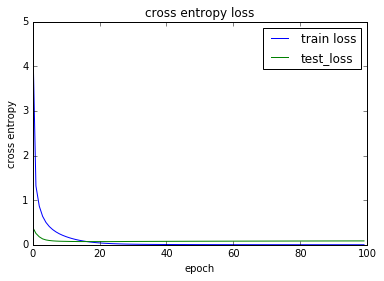

In [12]:
x = np.arange(100)
plt.plot(x, trn_loss_list)
plt.plot(x, test_loss_list)
plt.title("cross entropy loss")
plt.legend(["train loss", "test_loss"])
plt.xlabel("epoch")
plt.ylabel("cross entropy")

## Accuracy plot

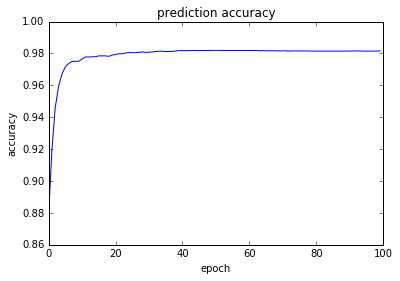

In [13]:
x = np.arange(100)
plt.plot(x, test_accuracy_list)
plt.title("prediction accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")